<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-02-17 20:23:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  29.9MB/s    in 4.9s    

2026-02-17 20:23:16 (31.3 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


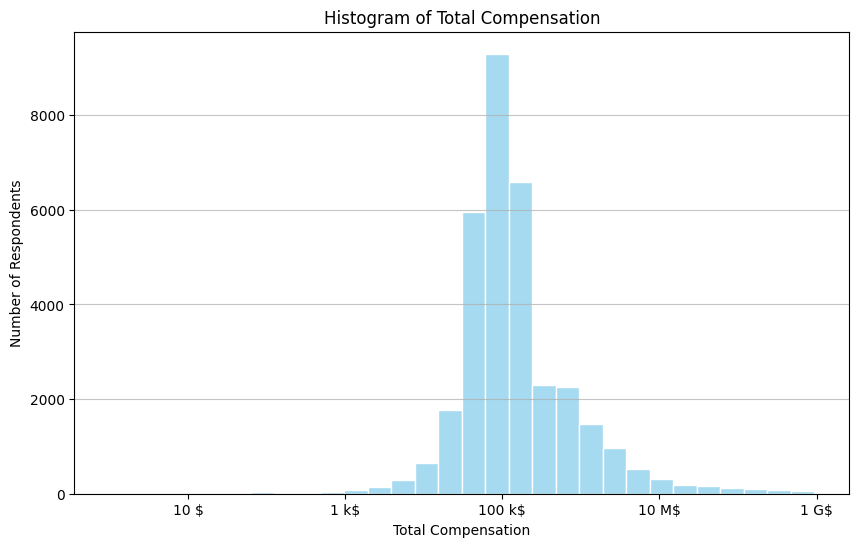

In [10]:
QUERY = """
SELECT CompTotal, COUNT(*) AS Count
FROM main
WHERE CompTotal IS NOT NULL
GROUP BY CompTotal;
"""
df_comp_total = pd.read_sql_query(QUERY, conn)

df_comp_total = df_comp_total.dropna(subset=['CompTotal']) # drop nulls
df_comp_total = df_comp_total[df_comp_total['CompTotal'] < 1e9] # exclude outliers

df_comp_total.shape, df_comp_total.head() # check query ran

#create histogram
!pip install seaborn
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df_comp_total,
    x='CompTotal',
    weights='Count',
    log_scale=True,  # Crucial for wide-ranging data
    bins=30,
    color='skyblue',
    edgecolor='white'
)
ax.xaxis.set_major_formatter(ticker.EngFormatter(unit='$')) # replace log with financial
plt.title('Histogram of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Box Plots**

Plot a box plot of Age.


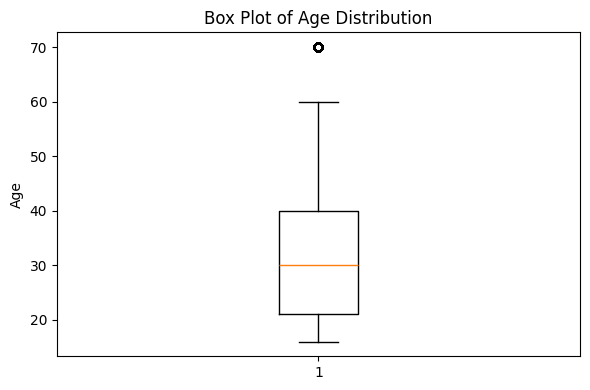

In [11]:
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
  AND Age != 'Prefer not to say';
"""
df_age = pd.read_sql_query(QUERY, conn)

df_age.head(), df_age.shape

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_age['Age_numeric'] = df_age['Age'].map(age_mapping) # create new column with mapped age
df_age = df_age.dropna(subset=['Age_numeric']) # drop nulls from new column

#create box plot
plt.figure(figsize=(6, 4))
plt.boxplot(df_age['Age_numeric'], showfliers=True) # excludes outliers
plt.ylabel('Age')
plt.title('Box Plot of Age Distribution')
plt.tight_layout()
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


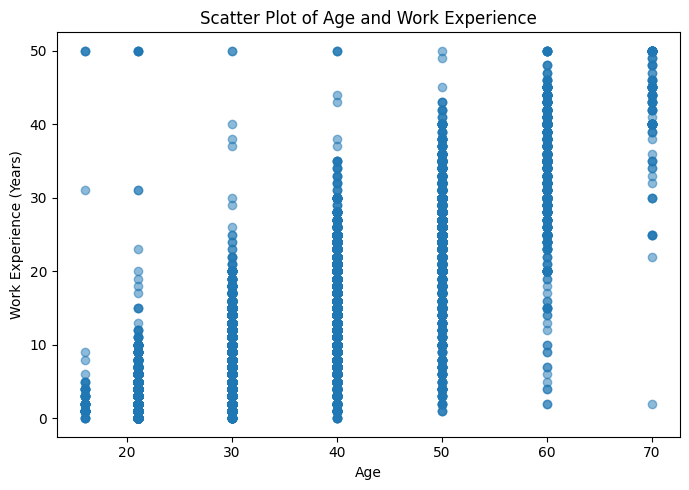

In [12]:
QUERY = """
SELECT Age, WorkExp
FROM main
WHERE Age IS NOT NULL
  AND Age != 'Prefer not to say'
  AND WorkExp IS NOT NULL;
"""
df_age_work = pd.read_sql_query(QUERY, conn)

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_age_work['Age_numeric'] = df_age_work['Age'].map(age_mapping) # create new column with mapped age
df_age_work = df_age_work.dropna(subset=['Age_numeric', 'WorkExp']) # drop nulls

#create scatterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(
    df_age_work['Age_numeric'],
    df_age_work['WorkExp'],
    alpha=0.5
)

plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.title('Scatter Plot of Age and Work Experience')
plt.tight_layout()
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


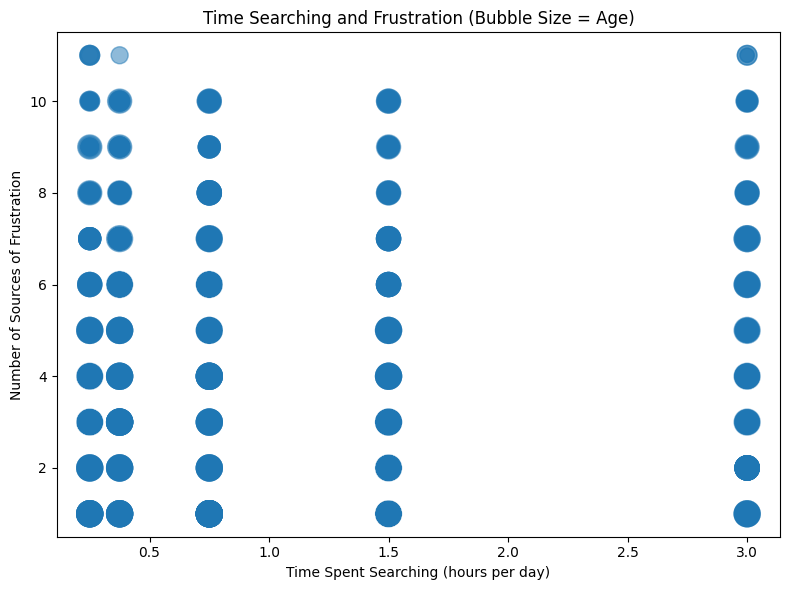

In [13]:
QUERY = """
SELECT Age, TimeSearching, Frustration
FROM main
WHERE Age IS NOT NULL
  AND Age != 'Prefer not to say'
  AND TimeSearching IS NOT NULL
  AND Frustration IS NOT NULL;
"""
df_age_searching_frustration = pd.read_sql_query(QUERY, conn)

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_age_searching_frustration['Age_numeric'] = df_age_searching_frustration['Age'].map(age_mapping) # create new column with mapped age

searching_mapping = {
    'Less than 15 minutes a day': 0.25,
    '15-30 minutes a day': 0.375,
    '30-60 minutes a day': 0.75,
    '60-120 minutes a day': 1.5,
    'Over 120 minutes a day': 3
}

df_age_searching_frustration['TimeSearching_num'] = df_age_searching_frustration['TimeSearching'].map(searching_mapping) # create new column with mapped

df_age_searching_frustration['Frustration_count'] = (
    df_age_searching_frustration['Frustration']
    .str.split(';')
    .apply(len)
)

df_age_searching_frustration = df_age_searching_frustration[['Age_numeric', 'TimeSearching_num', 'Frustration_count']] # return columns needed for chart
df_age_searching_frustration

# create bubble chart
plt.figure(figsize=(8, 6))
plt.scatter(
    df_age_searching_frustration['TimeSearching_num'],
    df_age_searching_frustration['Frustration_count'],
    s=df_age_searching_frustration['Age_numeric'] * 5, # multiply to emphasise differences in bubble size
    alpha=0.5
)
plt.xlabel('Time Spent Searching (hours per day)')
plt.ylabel('Number of Sources of Frustration')
plt.title('Time Searching and Frustration (Bubble Size = Age)')
plt.tight_layout()
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


Count by langauge: DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


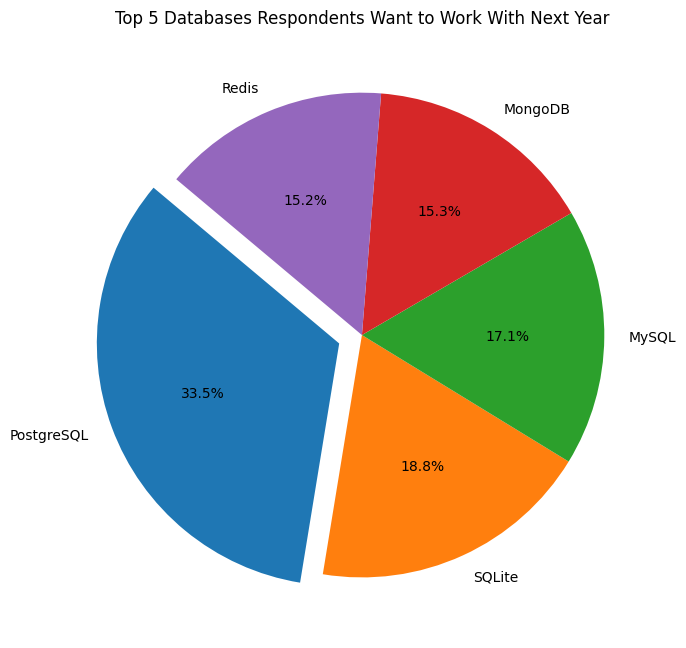

In [14]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL;
"""
df_db = pd.read_sql_query(QUERY, conn)

# split, explode and count data
db_counts = (
    df_db['DatabaseWantToWorkWith']
    .str.split(';')     # split multi-select answers
    .explode()          # one database per row
    .str.strip()        # clean whitespace
    .value_counts()     # count frequency
    .head(5)            # top 5
)

print('Count by langauge:', db_counts)

# create pie chart
explode = [0.1] + [0] * (len(db_counts) - 1) # make biggest slice explode

plt.figure(figsize=(7, 7))
plt.pie(
    db_counts.values,
    labels=db_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode
)

plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.tight_layout()
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


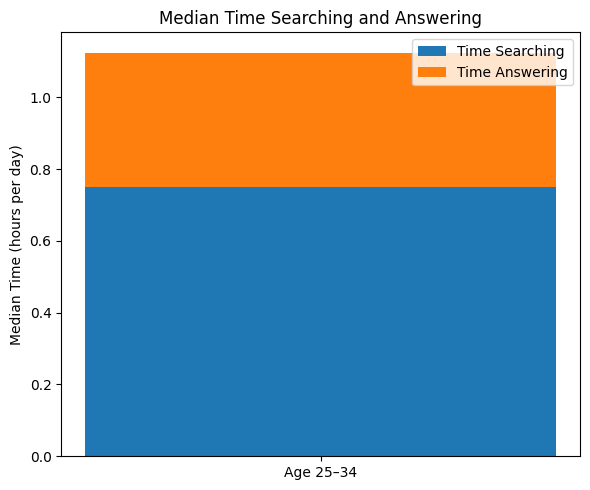

In [15]:
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age IN ('25-34 years old') -- filter for 25-34 age group
  AND TimeSearching IS NOT NULL
  AND TimeAnswering IS NOT NULL;
"""
df_time = pd.read_sql_query(QUERY, conn)

time_search_mapping = {
    'Less than 15 minutes a day': 0.25,
    '15-30 minutes a day': 0.375,
    '30-60 minutes a day': 0.75,
    '60-120 minutes a day': 1.5,
    'Over 120 minutes a day': 3
}

df_time['TimeSearching_num'] = df_time['TimeSearching'].map(time_search_mapping) # create new column and apply TimeSearching mapping

time_answer_mapping = {
    'Less than 15 minutes a day': 0.25,
    '15-30 minutes a day': 0.375,
    '30-60 minutes a day': 0.75,
    '60-120 minutes a day': 1.5,
    'Over 120 minutes a day': 3
}

df_time['TimeAnswering_num'] = df_time['TimeAnswering'].map(time_answer_mapping) # create new column and apply TimeAnswer mapping

median_searching = df_time['TimeSearching_num'].median()
median_answering = df_time['TimeAnswering_num'].median()

# create stacked bar
plt.figure(figsize=(6, 5))

plt.bar(
    ['Age 25–34'],
    [median_searching],
    label='Time Searching'
)

plt.bar(
    ['Age 25–34'],
    [median_answering],
    bottom=[median_searching],
    label='Time Answering'
)

plt.ylabel('Median Time (hours per day)')
plt.title('Median Time Searching and Answering')
plt.legend()
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


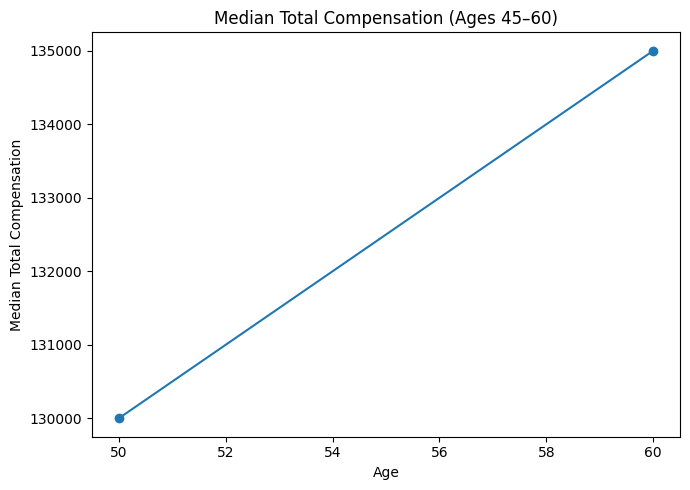

In [16]:
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old')
  AND CompTotal IS NOT NULL;
"""
df_comp_age = pd.read_sql_query(QUERY, conn)

age_mapping = {
    '45-54 years old': 50,
    '55-64 years old': 60
}

df_comp_age['Age_numeric'] = df_comp_age['Age'].map(age_mapping) # add new numeric column and add mapping

# calculate median comptotal by age
median_comp_by_age = (
    df_comp_age
    .groupby('Age_numeric')['CompTotal']
    .median()
    .reset_index()
)

#create line chart
plt.figure(figsize=(7, 5))
plt.plot(
    median_comp_by_age['Age_numeric'],
    median_comp_by_age['CompTotal'],
    marker='o'
)

plt.xlabel('Age')
plt.ylabel('Median Total Compensation')
plt.title('Median Total Compensation (Ages 45–60)')
plt.tight_layout()
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


MainBranch
Developer by profession         50207
Code as part of work/studies     6511
Learning to code                 3875
Code as a hobby                  3334
No longer a developer            1510
Name: count, dtype: int64


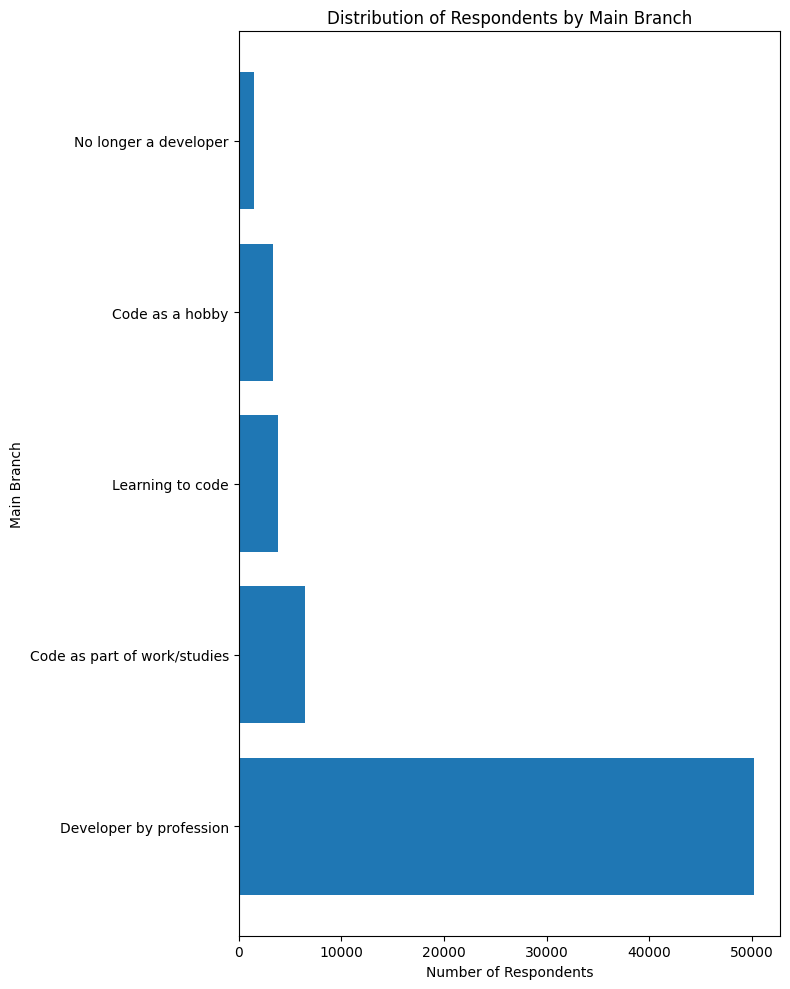

In [17]:
QUERY = """
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL;
"""
df_branch = pd.read_sql_query(QUERY, conn)

# rename branch types
df_branch['MainBranch'] = df_branch['MainBranch'].replace({
    'I used to be a developer by profession, but no longer am':
        'No longer a developer',
    'I code primarily as a hobby':
        'Code as a hobby',
    'I am learning to code':
        'Learning to code',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies':
        'Code as part of work/studies',
    'I am a developer by profession':
        'Developer by profession'
})

branch_counts = df_branch['MainBranch'].value_counts() # create value counts
print(branch_counts)

#create horizontal bar chart
plt.figure(figsize=(8, 10))
plt.barh(
    branch_counts.index,
    branch_counts.values
)

plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Distribution of Respondents by Main Branch')
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [18]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
